# MNIST 模型強化

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()


## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


## 步驟2：改用 CNN 模型

In [2]:
# 建立模型
from tensorflow.keras import layers
import numpy as np

input_shape=(28, 28, 1)
# 增加一維在最後面
x_train_norm = np.expand_dims(x_train_norm, -1)
x_test_norm = np.expand_dims(x_test_norm, -1)

# CNN 模型
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [3]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/5
1500/1500 [==============================] - 44s 28ms/step - loss: 0.2482 - accuracy: 0.9221 - val_loss: 0.0702 - val_accuracy: 0.9791
Epoch 2/5
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.0511 - val_accuracy: 0.9852
Epoch 3/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0695 - accuracy: 0.9785 - val_loss: 0.0559 - val_accuracy: 0.9825
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0589 - accuracy: 0.9811 - val_loss: 0.0443 - val_accuracy: 0.9879
Epoch 5/5
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0367 - val_accuracy: 0.9896
loss: 0.0277
accuracy: 0.9903


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
import math

def Conv_Width(W, F, P, S):
    return math.floor(((W - F + 2 * P) / S) + 1)

def Pool_Width(W, F, S):
    return math.floor((W - F) / S + 1)

Conv_Width(28, 3, 0, 1)

26

In [6]:
Pool_Width(26, 2, 2)

13

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


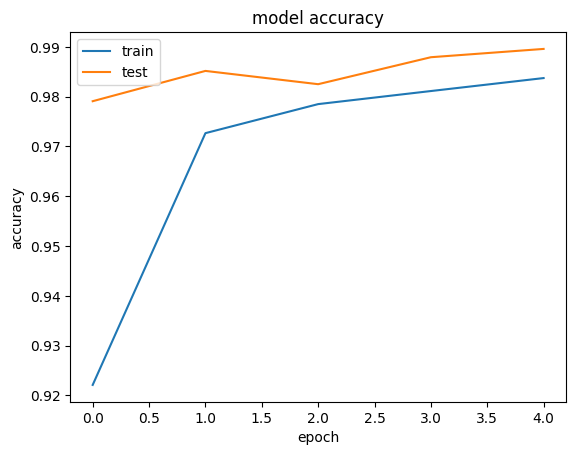

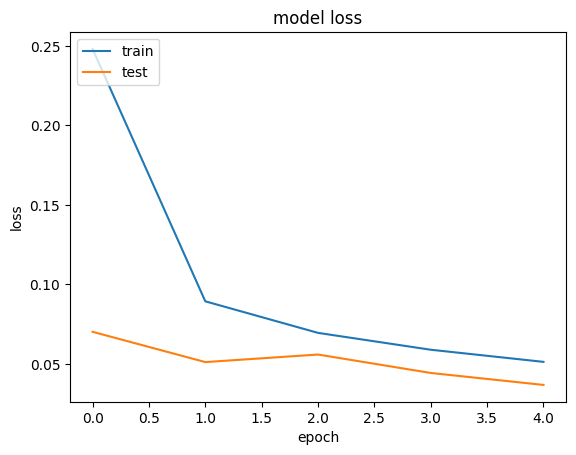

In [7]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()